<a href="https://colab.research.google.com/github/AashiDutt/AI-and-ML-for-Coders/blob/main/Chapter_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab contains code for:

1. Techniques for predicting Time Series

  a) Naive Prediction to create a baseline

In [9]:
# Navive Prediction to create a baseline - bsic method to predict a time series
# is to say that predicted value at t+1 is same as the value at t, effectively shifting time series by single period.

#Creating Time Series

import matplotlib.pyplot as plt
import numpy as np

def trend(time, slope = 0):
  return slope * time

#Seasonality - data repeats itself after a time
def seasonal_pattern(season_time): 
  return np.where(season_time < 0.4, np.cos(season_time *2*np.pi), 1/np.exp(3*season_time))

def seasonality(time, period, amplitude, phase = 0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

# Noise is random perturbations in time series that increases unpredictability
def noise(time, noise_level = 1, seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

time = np.arange( 4 * 365 + 1, dtype = "float32")
baseline = 10
series = trend(time, .05)
baseline = 10
amplitude = 15
slope = 0.09
noise_level = 6


#create series

series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude = amplitude)

#Update noise

series += noise(time, noise_level, seed = 42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [10]:
def plot_series(time, series, format = "-", start = 0, end = None):
  plt.plot(time[start:end],series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

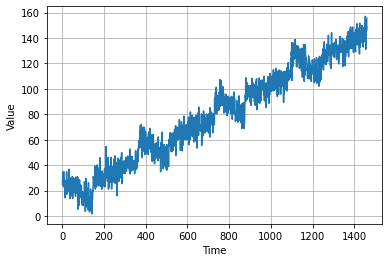

In [11]:
plot_series(time, series)

In [ ]:
#measuring prediction accuracy
# MSE and MAE


In [7]:
# Moving average for prediction
# instead of taking t-1 value to predict value at t
# take 30 values, average them to predict value at t\

def moving_average_forecast(series, window_size):
  forecast= []
  for time in range(len(series)-window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize = (10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)
  

In [8]:
moving_average_forecast(series, 10)

array([ 28.030111,  27.521862,  27.388794, ..., 145.15088 , 145.26524 ,
       145.73996 ], dtype=float32)